In [17]:
import pandas as pd 

import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [18]:
#create a dtaframe using the given json file
df = pd.read_json('bmidata.json')

In [19]:
df.head()

,Gender,HeightCm,WeightKg
0,Male,171,96
1,Male,161,85
2,Male,180,77
3,Female,166,62
4,Female,150,70


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Gender    6 non-null      object
 1   HeightCm  6 non-null      int64 
 2   WeightKg  6 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 272.0+ bytes


In [21]:
df.shape

(6, 3)

In [22]:
#Let transfor this json file into a csv file
df.to_csv('Newbmidata.csv', index=False)

# Creating the main BMI calculator Apps

In [23]:
# Calculate BMI using this below formula:
#BMI(kg/m2) = mass(kg) / height(m)2

In [24]:
import csv

class BMI:
    bmi_category ={ 'UW' :'Underweight',
                    'NW': 'Normal Weight',
                    'OW': 'Over Weight',
                    'MO': 'Moderately obese',
                    'SO': 'Severly obese',
                    'VSO': 'Very Severly obese',
                   }

    health_risk = {
                    'MR':'Malnutrition Risk',
                    'LR': 'Low Risk',
                    'ER': 'Enhanced Risk',
                    'MRS': 'Medium Risk',
                    'HR': 'High Risk',
                    'VHR': 'Very High Risk',
    }


def read_contents():
    list_of_row = []
    with open('Newbmidata.csv') as file:
        alllines = csv.reader(file)
        for row in alllines:
            list_of_row.append(row)
        return list_of_row


def finaldata_with_bmi(alldata):
    line_count = 0
    notValidData = []
    validData = []
    for row in alldata:
        if line_count == 0:
            line_count = 1
        elif row[0].isalpha() == True and row[1].isnumeric() == True and row[2].isnumeric() == True :
            bmi = calculate_bmi(row)
            validData.append(row+bmi)
            line_count +=1
        else:
            notValidData.append(row)
            line_count +=1
    # print('this data is not valid-->',notValidData)
    # print('total_rows-->',line_count)
    return validData


def calculate_bmi(data):
    BMI_categoty= None
    Health_risk= None
    BMI_range = None
    x =int(data[1])
    y = int(data[2])
    bmi = y/((x/100)**2)
    if bmi <= 18.4 :
        BMI_category = BMI.bmi_category.get('UW')
        BMI_range = bmi
        Health_risk = BMI.health_risk.get('MR')
    elif bmi >=18.5 and bmi <= 24.9:
        BMI_category = BMI.bmi_category.get('NW')
        BMI_range = bmi
        Health_risk = BMI.health_risk.get('LR')
    elif bmi >=25 and bmi <= 29.9:
        BMI_category = BMI.bmi_category.get("OW")
        BMI_range = bmi
        Health_risk = BMI.health_risk.get('ER')
    elif bmi >=30 and bmi <= 34.9:
        BMI_category = BMI.bmi_category.get("MO")
        BMI_range = bmi
        Health_risk = BMI.health_risk.get('MRS')
    elif bmi >= 35 and bmi <= 39.9:
        BMI_category = BMI.bmi_category.get("SO")
        BMI_range = bmi
        Health_risk = BMI.health_risk.get('HR')
    elif bmi > 40:
        BMI_category = BMI.bmi_category.get("VSO")
        BMI_range = bmi
        Health_risk = BMI.health_risk.get('VHR')
    bmi_list =[BMI_category,BMI_range,Health_risk]
    return bmi_list


def write_csv(data):
    with open('output_Newbmidata.csv', 'w',newline='') as file:
        csv_data = csv.writer(file, delimiter=',')
        csv_data.writerow(['Gender', 'Height', 'Weight', 'BMI_category', 'BMI_range', 'Health_risk'])
        for row in data:
            # print(row)
            csv_data.writerows([row])
    return 'New csv file created successfully..'


if __name__ == '__main__':
    contents = read_contents()
    # print(result)
    finaldata = finaldata_with_bmi(contents)
    # print('final data with BMI-->',finaldata)
    result = write_csv(finaldata)
    print(result)

New csv file created successfully..


In [25]:
#create a csv file using the given json file
New_df = pd.read_csv('output_Newbmidata.csv')

In [40]:
New_df.shape

(6, 6)

In [41]:
#check the new columns in the new csv file using pandas dataframe
New_df.head(6)

,Gender,Height,Weight,BMI_category,BMI_range,Health_risk
0,Male,171,96,Moderately obese,32.830615,Medium Risk
1,Male,161,85,Moderately obese,32.791945,Medium Risk
2,Male,180,77,Normal Weight,23.765432,Low Risk
3,Female,166,62,Normal Weight,22.499637,Low Risk
4,Female,150,70,Moderately obese,31.111111,Medium Risk
5,Female,167,82,Over Weight,29.402273,Enhanced Risk


In [38]:
#Question2: Number of total overweigh using BMI category using unique() funtion show that we have one person
New_df['BMI_category'].unique()

array(['Moderately obese', 'Normal Weight', 'Over Weight'], dtype=object)

In [39]:
#The funstion count give the distribution of the BMI category
New_df['BMI_category'].value_counts()

Moderately obese    3
Normal Weight       2
Over Weight         1
Name: BMI_category, dtype: int64

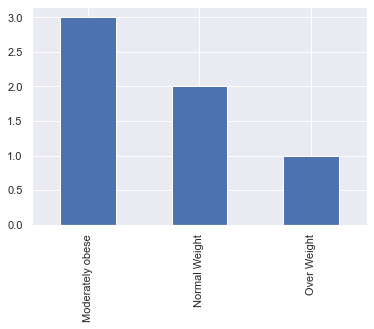

In [36]:
#BMI category plot representation 
New_df['BMI_category'].value_counts().plot(kind='bar');